# roboflow 테스트

In [8]:
!pip install roboflow
!pip install tensorflow
!pip install opencv-python-headless
!pip install numpy
!pip install autodistill-roboflow-universe
!pip install inference-sdk
!pip install google-api-python-client google-auth-httplib2 google-auth-oauthlib roboflow

# roboflow 라이브러리에서 프로젝트와 모델 드드

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="RYckXwLEAVrEmpxhNLBP")

In [3]:
project = rf.workspace("blackice-1vgqj").project("black-ice-detection-2")
model = project.version(2).model

loading Roboflow workspace...
loading Roboflow project...


In [5]:
# 로컬 이미지 파일 경로
results = model.predict("C:/Users/sunny/yolov5/test.jpg", confidence=40, overlap=30).json()
print(results)

{'predictions': [], 'image': {'width': '1200', 'height': '800'}}


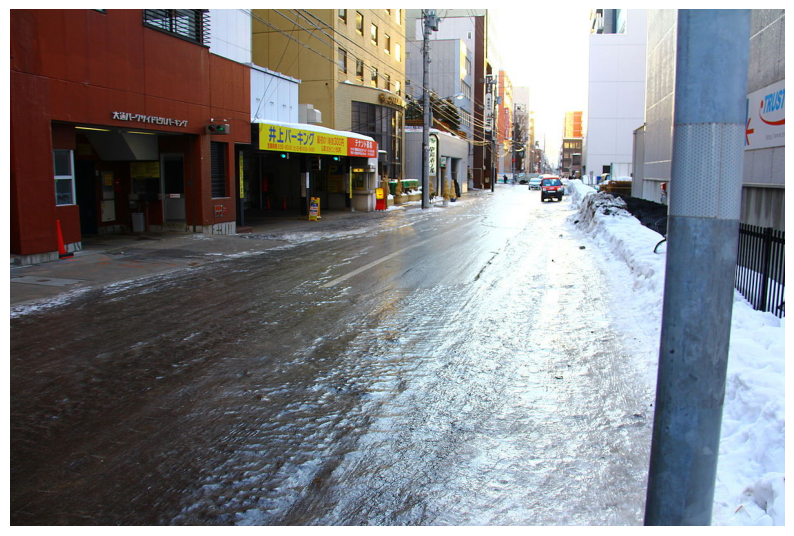

In [7]:
import cv2
from roboflow import Roboflow
import matplotlib.pyplot as plt

# 이미지 로드
image = cv2.imread("C:/Users/sunny/yolov5/test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 결과 시각화
for prediction in results['predictions']:
    x, y, w, h = prediction['x'], prediction['y'], prediction['width'], prediction['height']
    cv2.rectangle(image, (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), (0, 255, 0), 2)
    cv2.putText(image, prediction['class'], (int(x-w/2), int(y-h/2)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()